In [1]:
import mysql.connector
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import json
from scipy import stats
import os
import _pickle as cPickle
import warnings
warnings.filterwarnings('ignore')

os.chdir("C:/Users/Nicholas Bonaker/PycharmProjects/NomonWeb/")
    
def r(x, y):
    return x != y


def calc_MSD(a, b):
    
    if a[-1] == "_" or a[-1] == " ":
        a = a[:-1]
    if b[-1] == "_" or b[-1] == " ":
        b = b[:-1]

    a = np.array(list(a))
    b = np.array(list(b))

    D = np.zeros((a.size, b.size))

    for i in range(a.size):
        D[i, 0] = i

    for j in range(b.size):
        D[0, j] = j

    for i in range(a.size):
        for j in range(b.size):
            D[i, j] = min(D[i-1, j]+1, D[i, j-1]+1, D[i-1, j-1] + r(a[i], b[j]))
    return D[-1, -1], D[-1, -1] / b.size

time_rotate_li = [4]
for i in range(21):
    time_rotate_li += [4*np.exp((-i)/10)]
    
scan_delay_li = [2]
for i in range(21):
    scan_delay_li += [2*np.exp((-i)/14)]

extra_delay_li = [2]
for k in range(11):
    extra_delay_li += [0.2*(10-k)]


mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mala2ki7!",
    database="MIuserDB"
)
mycursor = mydb.cursor()


In [6]:
# with open("D:/Users/nickb/PycharmProjectsD/NomonWeb/v1.1.2/resources/phrases_oov.json", 'rb') as fp:
#     oov_phrases = json.load(fp)

with open("phrases/phrases_oov.json", 'rb') as fp:
    oov_phrases = json.load(fp)

entry_df = pd.DataFrame(columns=["id", "Session Number", "Keyboard", "phrase_num", "typed_len", "num_click", "num_sel", 
                                 "num_corr", "start", "end", "Final Error Rate", "Time Rotate", 
                                 "Scan Delay", "Extra Delay", "is_oov"])

software_names = {"nomon": "Nomon", "rowcol": "RCS"}

user = 63
# Claire Picture Selection
if user == 85:
    data_tables = [
    ["nomon_session_1_user_85", "nomon", "picture"],
    ["nomon_session_2_user_85", "nomon", "picture"],
    ["nomon_session_3_user_85", "nomon", "picture"],
    ["nomon_session_4_user_85", "nomon", "picture"],
    ["nomon_session_5_user_85", "nomon", "picture"],
    ["nomon_session_6_user_85", "nomon", "picture"],
    ["nomon_session_7_user_85", "nomon", "picture"],
    ["nomon_session_8_user_85", "nomon", "picture"],
    ["nomon_session_9_user_85", "nomon", "picture"],
    
    ["nomon_session_10_user_85", "nomon", "picture"],
    ["nomon_session_11_user_85", "nomon", "picture"],
    ["nomon_session_12_user_85", "nomon", "picture"],
    ["nomon_session_15_user_85", "nomon", "text"],
    ["nomon_session_16_user_85", "nomon", "text"],
    ["nomon_session_17_user_85", "nomon", "text"],
    ["nomon_session_18_user_85", "nomon", "text"],
    ]
elif user == 7:
    data_tables = [	
    ["nomon_session_2_user_7", "nomon", "text"],
    ["nomon_session_3_user_7", "nomon", "text"],
    ["nomon_session_6_user_7", "nomon", "text"],
    ["nomon_session_7_user_7", "nomon", "text"],
    ["nomon_session_8_user_7", "nomon", "text"],
    ["nomon_session_9_user_7", "nomon", "text"],
    ["nomon_session_21_user_7", "nomon", "text"],
    ["nomon_session_22_user_7", "nomon", "text"],
    ["nomon_session_23_user_7", "nomon", "text"],
    ["nomon_session_24_user_7", "nomon", "text"],
    ["nomon_session_25_user_7", "nomon", "text"],
    ["nomon_session_26_user_7", "nomon", "text"],
    ["nomon_session_27_user_7", "nomon", "text"],
    ["nomon_session_28_user_7", "nomon", "text"],
    ["nomon_session_29_user_7", "nomon", "text"],
    ["nomon_session_30_user_7", "nomon", "text"],
    ["nomon_session_31_user_7", "nomon", "text"],
    ]
elif user == 84:
    data_tables = [
    ["nomon_session_2_user_84", "nomon", "picture"],
    ["nomon_session_4_user_84", "nomon", "picture"],
    ["nomon_session_5_user_84", "nomon", "picture"],
    ["nomon_session_6_user_84", "nomon", "picture"],
    ["nomon_session_7_user_84", "nomon", "picture"],
    ["nomon_session_8_user_84", "nomon", "picture"],
    ["nomon_session_10_user_84", "nomon", "picture"],
    ["nomon_session_11_user_84", "nomon", "picture"],
    ["nomon_session_13_user_84", "nomon", "picture"],
    ["nomon_session_14_user_84", "nomon", "picture"],
    ["nomon_session_15_user_84", "nomon", "picture"],
    ["nomon_session_16_user_84", "nomon", "picture"],
    ["nomon_session_17_user_84", "nomon", "picture"],
    ["nomon_session_18_user_84", "nomon", "picture"],
    ["nomon_session_19_user_84", "nomon", "picture"],
    ["nomon_session_23_user_84", "nomon", "picture"],
    ["nomon_session_24_user_84", "nomon", "picture"],
    ["nomon_session_25_user_84", "nomon", "picture"],
    ["nomon_session_26_user_84", "nomon", "picture"],
    ["nomon_session_27_user_84", "nomon", "picture"],
    ["nomon_session_28_user_84", "nomon", "text"],
    ["nomon_session_29_user_84", "nomon", "text"],
    ["nomon_session_30_user_84", "nomon", "text"],
    ["nomon_session_31_user_84", "nomon", "text"],
    ["nomon_session_32_user_84", "nomon", "text"],
    ["nomon_session_33_user_84", "nomon", "text"],
    ["nomon_session_34_user_84", "nomon", "text"],
    ]
elif user == 77:
    data_tables = [
    ["nomon_session_1_user_77", "nomon", "picture"],
    ["nomon_session_2_user_77", "nomon", "picture"],
    ["nomon_session_3_user_77", "nomon", "picture"],
    ["nomon_session_4_user_77", "nomon", "picture"],
    ["nomon_session_5_user_77", "nomon", "picture"],
    ["nomon_session_6_user_77", "nomon", "picture"],
    # ["nomon_session_7_user_77", "nomon", "picture"],
    ["nomon_session_8_user_77", "nomon", "picture"],
    ["nomon_session_9_user_77", "nomon", "picture"],
    ["nomon_session_10_user_77", "nomon", "picture"],
    ["nomon_session_11_user_77", "nomon", "text"],
    ["nomon_session_12_user_77", "nomon", "text"],
    ["nomon_session_13_user_77", "nomon", "text"],
    ["nomon_session_14_user_77", "nomon", "text"],
    ["nomon_session_15_user_77", "nomon", "text"],
    ["nomon_session_16_user_77", "nomon", "text"],
    ["nomon_session_18_user_77", "nomon", "text"],
    ["nomon_session_19_user_77", "nomon", "text"],

    ]
elif user == 70:
    data_tables = [
    ["nomon_session_1_user_70", "nomon", "picture"],
    ["nomon_session_2_user_70", "nomon", "picture"],
    ["nomon_session_3_user_70", "nomon", "picture"],
    ["nomon_session_4_user_70", "nomon", "picture"],
    ["nomon_session_5_user_70", "nomon", "picture"],
    ["nomon_session_6_user_70", "nomon", "picture"],
    ["nomon_session_7_user_70", "nomon", "picture"],
    ["nomon_session_9_user_70", "nomon", "picture"],
    ["nomon_session_10_user_70", "nomon", "picture"],
    ["nomon_session_11_user_70", "nomon", "picture"],
    ["nomon_session_12_user_70", "nomon", "picture"],
    ["nomon_session_13_user_70", "nomon", "picture"],
    ["nomon_session_14_user_70", "nomon", "picture"],
    ["nomon_session_15_user_70", "nomon", "picture"],
    ]
elif user == 63:
    data_tables = [
        ["nomon_session_1_user_63", "nomon", "picture"],
        # ["nomon_session_2_user_63", "nomon", "picture"],
        ["nomon_session_3_user_63", "nomon", "picture"],
        ["nomon_session_4_user_63", "nomon", "picture"],
        ["nomon_session_5_user_63", "nomon", "picture"],
        ["nomon_session_6_user_63", "nomon", "picture"],
        ["nomon_session_7_user_63", "nomon", "picture"],
    ]

click_df = pd.DataFrame(columns=["Session", "Phrase", "Clock Speed", "Click Time","Click Load", "Task", "Final Error"])

session_num = 0

for data_table, software, style in data_tables:
    session_num += 1

    mycursor.execute("SELECT DISTINCT phrase_num FROM "+data_table)
    phrase_nums = np.array(mycursor.fetchall()).T[0]
    
    phrase_offset = 0
    for phrase_num in phrase_nums:
        
        mycursor.execute("SELECT typed_text FROM "+data_table+" WHERE phrase_num = "+str(phrase_num)+
                         " ORDER BY timestamp DESC LIMIT 1")
        typed_text = mycursor.fetchall()[0][0]
        
        mycursor.execute("SELECT phrase FROM "+data_table+" WHERE phrase_num = "+str(phrase_num)+ " LIMIT 1")
        phrase_text = mycursor.fetchall()[0][0]
        
        
        
        if style == "picture":
            
            typed_text = typed_text.replace("..", "")
            
            typed_text_arr=typed_text.split(" ")[:-1]
            typed_len = len(typed_text_arr)
            if typed_len < 3:
                phrase_offset -=1
                continue
            elif typed_len < 5:
                phrase_text_arr=phrase_text.split(" ")[:typed_len]
            else:
                phrase_text_arr=phrase_text.split(" ")[:-1]
            
            uncorrected_error = calc_MSD(typed_text_arr, phrase_text_arr)[1]
            is_oov = False
            
        else:
            typed_text = typed_text.replace(".", "")
            typed_text = typed_text.replace("_", "")
        
            typed_len = len(typed_text)
            phrase_len = len(phrase_text)
            
            if phrase_len - typed_len > 4 and typed_len/phrase_len > .3:
                uncorrected_error = calc_MSD(typed_text, phrase_text[:typed_len])[1]
                print(phrase_text, uncorrected_error)
            elif typed_len/phrase_len < .3:
                print("skipped ", phrase_text)
                continue
                
            uncorrected_error = calc_MSD(typed_text, phrase_text)[1]
            is_oov = ["IV", "OOV"][phrase_text in oov_phrases]
        
        if typed_len == 0:
            phrase_offset -=1
            continue
        
        
        mycursor.execute("SELECT rel_click_times FROM "+data_table+" WHERE phrase_num = "+str(phrase_num)+
                             " ORDER BY timestamp ASC")
        click_times = [json.loads(click_arr) for click_arr in np.array(mycursor.fetchall()).T[0]]
        num_clicks = sum([len(click_arr) for click_arr in click_times])
        
        while len(click_times[0]) == 0:
            click_times = click_times[1:]
        flattened_click_times = [time for selection in click_times for time in selection]
        
        mycursor.execute("SELECT rotate_ind FROM "+data_table+" WHERE phrase_num = "+str(phrase_num)+
                                 " ORDER BY timestamp DESC LIMIT 1")
        rotate_ind = mycursor.fetchall()[0][0]
        
        mycursor.execute("SELECT COUNT(typed_text) FROM "+data_table+" WHERE phrase_num = "+str(phrase_num))
        num_selections = mycursor.fetchall()[0][0]
        
        for click_time in flattened_click_times:
            click_data = dict()
            
            click_data["Phrase"] = phrase_num + phrase_offset
            click_data["Session"] = session_num
            click_data["Clock Speed"] = time_rotate_li[rotate_ind]
            click_data["Click Time"] = click_time
            click_data["Click Load"] = num_clicks/num_selections
            click_data["Task"] = style
            click_data["Final Error"] = uncorrected_error
        
            click_df = click_df.append(click_data, ignore_index=True)
        
        
        
        
    
    # print(2*np.std(session_click_times), " ", session_time_rotates[-1], " ", session_num)
    

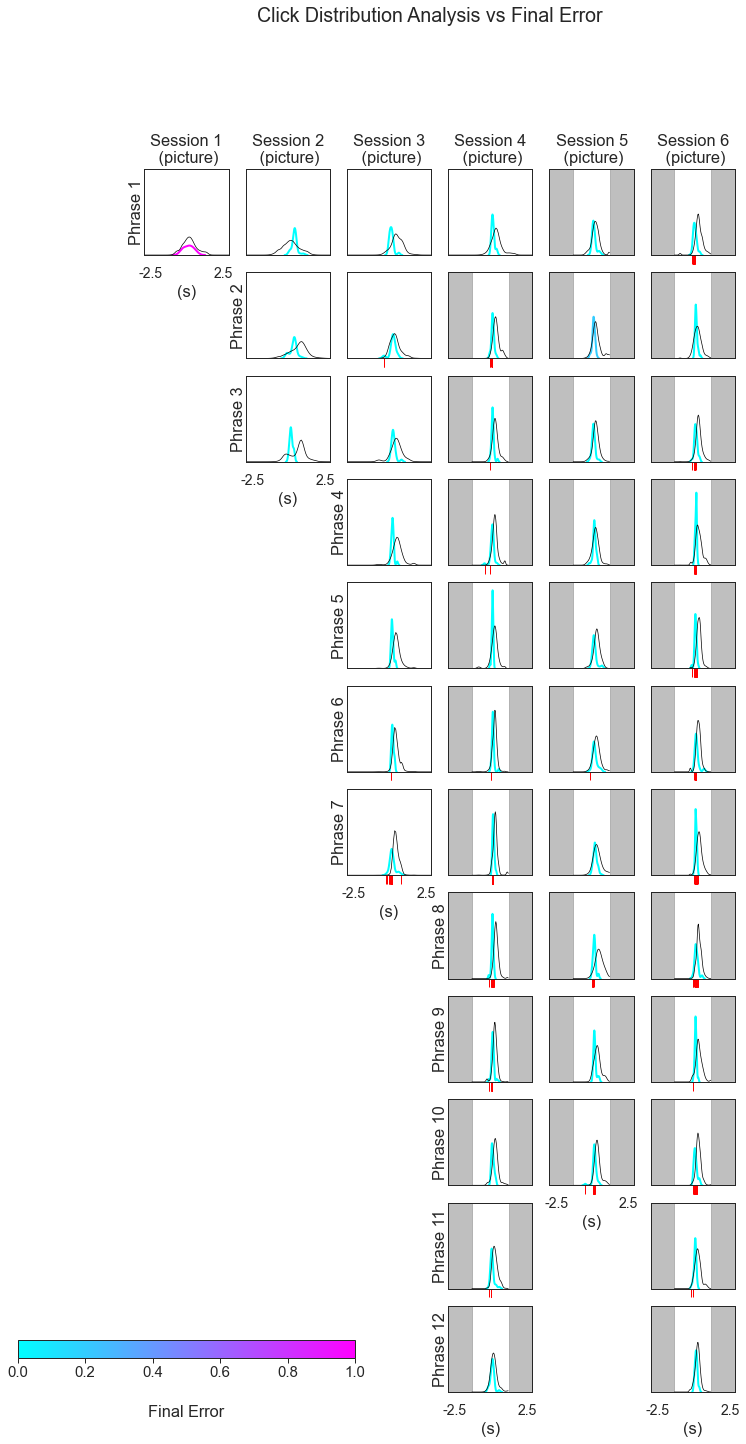

In [9]:
num_rows = int(max(click_df["Session"]))
num_cols = int(max(click_df["Phrase"]))

error_metric = "Click Load"
# error_metric = "Final Error"
error_max = max(click_df[error_metric])
error_min = min(click_df[error_metric])

sns.set_context("paper", font_scale=1.7)
sns.set_style("white")
sns.set_palette("tab10")

fig, axes = plt.subplots(num_cols, num_rows,figsize=(30*num_rows/17, 15*num_cols/8))
    
# plt.subplots_adjust(left=0.15)
axes = np.array(axes)
cmap = matplotlib.cm.get_cmap('cool')

rows_with_labels = []

cum_click_index=0

max_clock_speed = click_df["Clock Speed"].max()
cur_clock_speed = click_df["Clock Speed"][0]
kde = KernelDensityEstimation(cur_clock_speed)

for yin in click_df["Click Time"].to_numpy()[:15]:
    kde.add_point(yin)


for session_num in click_df["Session"].unique():
    session_df = click_df[(click_df["Session"] == session_num)]
    
    num_phrase_in_session = int(max(session_df["Phrase"]))  
    
    for phrase_num in range(1, num_cols+1):
        cur_ax = axes[int(phrase_num)-1, int(session_num)-1]
        phrase_df = session_df[(session_df["Phrase"] == phrase_num)]
        
        
        
        if len(phrase_df["Click Time"].to_numpy())> 0:
            
            # cur_ax.axvline(0, color="grey", linestyle="--")
            # cur_ax.axvline(np.mean(phrase_df["Click Time"].to_numpy()), color="k")
            

            error = (phrase_df[error_metric].to_numpy()[0]-error_min)/(error_max-error_min)
            rgba = cmap(error)
            # if session_num == 13:
            #     rgba=(0,0,0,1)
            
            sns.distplot(phrase_df["Click Time"], hist=False, color=rgba, kde_kws={"lw": 2}, norm_hist=False, ax=cur_ax)
            
            kde_dens = np.array(kde.dens_li)/np.sum(np.array(kde.dens_li)*(cur_clock_speed)/80)    
            cur_ax.plot(np.arange(-cur_clock_speed, cur_clock_speed, (cur_clock_speed*2)/80), kde_dens,
                        color="k", linestyle="-", linewidth=.7)
            cur_ax.axvspan(-2.5, -cur_clock_speed, alpha=0.25, color='k')
            cur_ax.axvspan(cur_clock_speed, 2.5, alpha=0.25, color='k')
            
            for yin, clock_speed in zip(phrase_df["Click Time"].to_numpy(), phrase_df["Clock Speed"].to_numpy()):
                if clock_speed != cur_clock_speed:
                    kde.update_dens(clock_speed)
                    cur_clock_speed = clock_speed
                    
                kde.add_point(yin)
            
            
            cum_kde_dens = np.cumsum(kde_dens)
            cum_kde_dens/=cum_kde_dens[-1]
            
            percentile = 0.05
            lower_percentile = np.arange(-2.5, 2.5, 5/80)[min(np.where(cum_kde_dens > percentile)[0])]
            upper_percentile = np.arange(-2.5, 2.5, 5/80)[min(np.where(cum_kde_dens > 1-percentile)[0])]
            outliers = phrase_df[(phrase_df["Click Time"] < lower_percentile) | (phrase_df["Click Time"] > upper_percentile)]           
            
            if outliers.size > 0:
                sns.rugplot(data=outliers, x="Click Time", height=-.1, color='r', linewidth=1, clip_on=False, ax=cur_ax)

            cur_ax.set_xlim(-2.5, 2.5)
            
            if phrase_num == num_phrase_in_session:
                cur_ax.set_xticks([-2.1, 2.2])
                cur_ax.xaxis.set_ticklabels([-2.5, 2.5])
                cur_ax.tick_params(axis='x',  which='major', pad=7, labelsize=14)
                cur_ax.set_xlabel("(s)")

            else:
                cur_ax.xaxis.set_ticklabels([])
                cur_ax.xaxis.label.set_visible(False)
                
            cur_ax.set_ylim(0,10)
            cur_ax.yaxis.set_ticklabels([])
            cur_ax.yaxis.set_label_coords(0, 0.4)
            
            if phrase_num == 1:
                cur_ax.title.set_text("Session "+str(session_num)+"\n ("+phrase_df["Task"].to_numpy()[0]+")")

            if session_num == 1:
                cur_ax.set_ylabel("Phrase "+str(phrase_num))
                rows_with_labels.append(phrase_num)
                
            elif not axes[int(phrase_num)-1, int(session_num)-2].axison and not phrase_num in rows_with_labels:
                cur_ax.set_ylabel("Phrase "+str(phrase_num))
                rows_with_labels.append(phrase_num)
                
            else:
                cur_ax.yaxis.label.set_visible(False)
                
    
       

        else:
            
            cur_ax.axis('off')
            
sm = matplotlib.cm.ScalarMappable(norm=plt.Normalize(error_min, error_max), cmap=cmap)
sm.set_array([])

if user == 85:
    axins = inset_axes(axes[-1][-2],
                        width="400%",  
                        height="20%",
                        loc='center',
                        borderpad=-5
                       )
elif user == 63:
    axins = inset_axes(axes[-1][0],
                        width="400%",  
                        height="20%",
                        loc='center',
                        borderpad=-5
                       )
else:
    axins = inset_axes(axes[-1][3],
                        width="400%",  
                        height="20%",
                        loc='center',
                        borderpad=-5
                       )

cbar = plt.colorbar(sm, cax=axins, orientation='horizontal')
cbar.set_label(error_metric, rotation=0,labelpad=25)

fig.suptitle("Click Distribution Analysis vs "+error_metric)         

plt.savefig("data_processing/MI_study/figures/"+str(user)+"/click_analysis_vs_"+error_metric.lower().replace(" ", "_")+".svg")

# plt.savefig("D:/Users/nickb/PycharmProjectsD/NomonWeb/data_processing/MI_study/figures/claire_click_analysis_vs_final_error.svg")

In [2]:

num_divs_click = 80
## prior def
mu0 = 0.05  # on a range [-1s,1s]
sigma0 = 0.14  # on a range [-1s,1s]
sigma0_sq = sigma0 * sigma0
range0 = 2

class Entropy:
    
    def __init__(self, clock_inf):
        self.clock_inf = clock_inf
        self.num_bits = 0
        self.bits_per_select = np.log(len(self.clock_inf.clocks_on)) / np.log(2)

    def update_bits(self):
        K = len(self.clock_inf.clocks_on)
        self.bits_per_select = np.log(K) / np.log(2)
        self.num_bits += self.bits_per_select
        return self.num_bits


class KernelDensityEstimation:
    
    def __init__(self, time_rotate, past_data=None):
        self.dens_li = []
        self.Z = 0
        self.ksigma =0
        self.ksigma0 = 0
        self.y_li = []
        self.y_ksigma = []
        self.damp = 0.96
        self.n_ksigma = max(5, int(1.0 / (1 - self.damp)))
        self.ns_factor = 1.06 / (self.n_ksigma ** 0.2)
        self.time_rotate = time_rotate
        
        self.n_hist = min(200, int(np.log(0.02) / np.log(self.damp)))

        # histogram bin index
        self.index_li = range(0, num_divs_click)
        # location of the histogram bins
        self.x_li = [index * self.time_rotate / num_divs_click - self.time_rotate / 2.0 \
                     for index in self.index_li]
        
        self.past_data = past_data 
        self.initialize_dens()
    
    def initialize_dens(self):
        self.Z = 0
        self.dens_li = []
        for x in self.x_li:
            diff = x - mu0

            dens = np.exp(-1/(2*sigma0_sq) * diff*diff)
            dens /= np.sqrt(2*np.pi*sigma0_sq)
            dens *= self.n_ksigma
            self.dens_li.append(dens)
            self.Z += dens
        self.ksigma0 = 1.06*sigma0 / (self.n_ksigma**0.2)
        self.ksigma = self.ksigma0
    
    # Assumes that data is a dictionary
    # of key z, dens ..
    def get_past_dens_li(self, dens_dict):
        if 'li' in dens_dict and 'z' in dens_dict and 'opt_sig' in dens_dict and 'y_li' in dens_dict:
            print("HAS KEY THO")

            self.dens_li = dens_dict['li']
            print("I'm starting(reading) and the self.dens_li" + str(dens_dict['li']))
            self.Z =  dens_dict['z']
            self.ksigma = dens_dict['opt_sig']
            print("Also the self.ksimga0" + str(dens_dict['opt_sig']))
            # THIS LINE ?????????
            # self.y_li_from_pre = dens_dict['y_li']
            self.y_li = dens_dict['y_li']
            self.y_ksigma = dens_dict['yksigma']
            print("IS THIS LINE THE PROBLEM?")
    
    # helper functions
    def normal(self, x, mu, sig_sq):
        return np.exp(-((x-mu)**2)/(2*sig_sq)) / float(np.sqrt(2*np.pi*sig_sq))
    
    def optimal_bandwith(self, things):
        n = len(things)
        return 1.06 * (n ** -0.2) * np.std(things)

    def ave_sigma_sq(self, eff_num_points, yLenEff):
        ysum = sum([y for y in self.y_li[0:yLenEff]])
        y2sum = sum([y**2 for y in self.y_li[0:yLenEff]])
        ave_sigma_sq = (self.n_ksigma - yLenEff) * self.ksigma0 * self.ksigma0
        if (yLenEff > 0):
            ave_sigma_sq += y2sum - ysum * ysum / yLenEff
        ave_sigma_sq /= self.n_ksigma
        
        return ave_sigma_sq

    # calculate the optimal bandwidth only with the latest yLenEff(effective) data
    def calc_ksigma(self, eff_num_points, yLenEff):
        # combine emnp.pirical and prior
        ave_sigma_sq = self.ave_sigma_sq(eff_num_points, yLenEff)

        # optimal bandwidth
        self.ksigma = self.ns_factor * np.sqrt(max(0.0001, ave_sigma_sq))
        return self.ksigma

    # When a new yin comes in, add that yin to kernel density estimation
    def increment_dens(self, yin, ksigma):
        self.Z = 0
        ksigma_sq = ksigma * ksigma
        for index in self.index_li:
            diff = self.x_li[index] - yin
            dens = np.exp(-1 / (2 * ksigma_sq) * diff * diff)
            dens /= np.sqrt(2 * np.pi * ksigma_sq)
            self.dens_li[index] = self.damp * self.dens_li[index] + dens
            # summing Z again to keep it fresh (& since have to anyway)
            self.Z += self.dens_li[index]
            
    def add_point(self, yin):
        if len(self.y_li) > self.n_hist:
            self.y_li.pop()
            self.y_ksigma.pop()
        self.y_li.insert(0, yin)
        self.y_ksigma.insert(0, kde.ksigma)
        # calculations
        self.increment_dens(yin, self.ksigma)
        self.calc_ksigma(80, min(self.n_ksigma, len(self.y_li)))
        
    def update_dens(self, new_time_rotate):
        # reset period
        self.time_rotate = new_time_rotate
        # location of histogram bins
        self.x_li = []
        for index in self.index_li:
            self.x_li.append(index * self.time_rotate / 80 - self.time_rotate / 2.0)
        for n in range(0, len(self.y_li)):
            self.increment_dens(self.y_li[n], self.y_ksigma[n])
        # min(self.n_ksigma, len(self.y_li)) is the effective number of recent y_li
        self.calc_ksigma(self.n_hist, min(self.n_ksigma, len(self.y_li)))
            

